<a href="https://colab.research.google.com/github/mzagoska/II/blob/main/ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 8.9 MB/s 
     |████████████████████████████████| 81 kB 9.0 MB/s 
     |████████████████████████████████| 210 kB 41.8 MB/s 
     |████████████████████████████████| 78 kB 7.0 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 147 kB 45.8 MB/s 
     |████████████████████████████████| 112 kB 43.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=e7d9f18398a2bef94c07ad903f17bfa30776a06af716a8a5de08bf14b5e336c5
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.1.0
    Uninstalling importlib-metadata-5.1.0:
      Successfully uninstalled importlib-metadata-5.1.0


In [2]:
import logging
import sys
import math
import optuna
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as cm
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [3]:
def my_plot_function(f, title: str, _x, _y, _z):
  x = np.linspace(-10, 10, 20) 
  y = np.linspace(-10, 10, 20) 
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure(figsize=(14, 10))
  ax = plt.axes(projection ='3d') 
  ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, alpha = 0.8)
  ax.scatter(_x, _y, _z, linewidths  = 8 , color='m', alpha = 1,
             label = 'Глобальный минимум')
  ax.legend(fontsize=10, loc='lower left' )
  ax.view_init(40, 45)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  ax.set_zlabel('z', fontsize=16)
  ax.set_title(title, fontsize=20)

In [4]:
def Matias(x: np.array, y:np.array) -> np.float128:
  return 0.26*(x*x + y*y) - 0.48*x*y
  
def Booth(x: np.array, y:np.array) -> np.float64:
  return (x + 2 * y - 7) * (x + 2 * y - 7) + (2 * x + y - 5) * (2 * x + y - 5)

In [5]:
def objective_Matias(trial):
  x = trial.suggest_float("x", -10, 10)
  y = trial.suggest_float("y", -10, 10)
  return Matias(x, y)
study = optuna.create_study()
study.optimize(objective_Matias, n_trials = 200)
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]

[I 2022-12-25 17:40:56,195] A new study created in memory with name: no-name-649d58e9-f8ec-431d-bf5c-92551539e57f
[I 2022-12-25 17:40:56,200] Trial 0 finished with value: 8.055228571196974 and parameters: {'x': -8.065388025234551, 'y': -2.8234158494255883}. Best is trial 0 with value: 8.055228571196974.
[I 2022-12-25 17:40:56,203] Trial 1 finished with value: 2.5400030389677646 and parameters: {'x': 7.851231673940422, 'y': 8.05390546139311}. Best is trial 1 with value: 2.5400030389677646.
[I 2022-12-25 17:40:56,209] Trial 2 finished with value: 19.202125651674997 and parameters: {'x': 6.675002981227976, 'y': -2.039876636848545}. Best is trial 1 with value: 2.5400030389677646.
[I 2022-12-25 17:40:56,212] Trial 3 finished with value: 21.763325984524553 and parameters: {'x': -6.377708906270536, 'y': 2.92696729613988}. Best is trial 1 with value: 2.5400030389677646.
[I 2022-12-25 17:40:56,215] Trial 4 finished with value: 56.31337643302094 and parameters: {'x': -6.689401316771311, 'y': 8.3

Результат работы Opruna для поиска оптимума функции Матьяса: x, y, z =  -0.23153394900900234 -0.23153394900900234 0.0021443187817481307


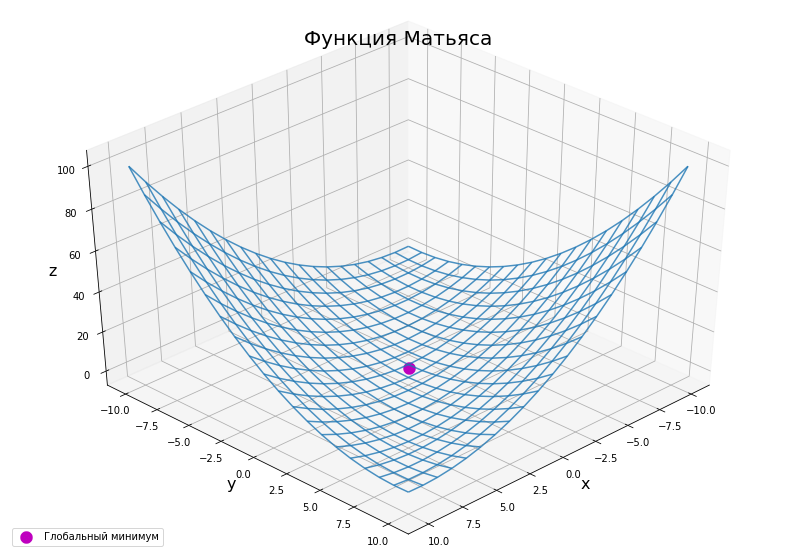

In [6]:
found_z = Matias(found_x, found_x)
print("Результат работы Opruna для поиска оптимума функции Матьяса: x, y, z = ",
      found_x, found_x, found_z)
my_plot_function(Matias, "Функция Матьяса", found_x, found_y, found_z )

In [7]:
def objective_Booth(trial):
  x = trial.suggest_float("x", -10, 10)
  y = trial.suggest_float("y", -10, 10)
  return Booth(x, y)
study = optuna.create_study()
study.optimize(objective_Booth, n_trials = 200)
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]

[I 2022-12-25 17:41:41,423] A new study created in memory with name: no-name-15971a85-f46b-4f84-8928-38e36ef6d2dc
[I 2022-12-25 17:41:41,432] Trial 0 finished with value: 25.857520732154722 and parameters: {'x': -2.5872883519156353, 'y': 5.1358044099953855}. Best is trial 0 with value: 25.857520732154722.
[I 2022-12-25 17:41:41,437] Trial 1 finished with value: 995.6850853084618 and parameters: {'x': -3.157236363713598, 'y': -7.563605278674279}. Best is trial 0 with value: 25.857520732154722.
[I 2022-12-25 17:41:41,443] Trial 2 finished with value: 1056.1200041489737 and parameters: {'x': -3.259467531838345, 'y': -7.899504569199591}. Best is trial 0 with value: 25.857520732154722.
[I 2022-12-25 17:41:41,451] Trial 3 finished with value: 356.0471540325789 and parameters: {'x': -8.420537086979422, 'y': 4.270595011380365}. Best is trial 0 with value: 25.857520732154722.
[I 2022-12-25 17:41:41,455] Trial 4 finished with value: 1183.0783382504858 and parameters: {'x': -3.16055806533845, 'y'

Результат работы Optuna для поиска оптимума функции Бута: x, y, z =  0.8525297957738587 0.8525297957738587 25.700381652562086


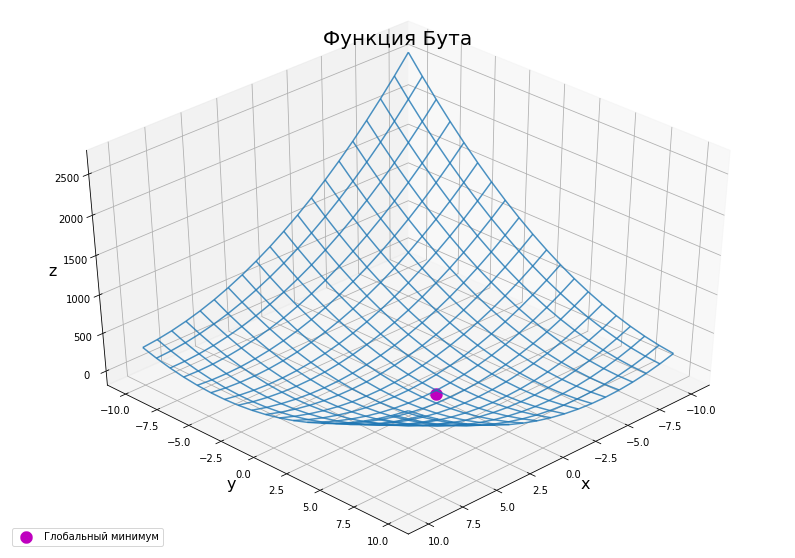

In [8]:
print("Результат работы Optuna для поиска оптимума функции Бута: x, y, z = ",
      found_x, found_x, Booth(found_x, found_x))
my_plot_function(Booth, "Функция Бута", found_x, found_y, found_z)

In [9]:
X, y = load_wine(return_X_y=True)
train_x, valid_x, train_y, valid_y = train_test_split(X, y)

def objective(trial):
  C = trial.suggest_float("C", 1e-5, 1, log=True)
  tol = trial.suggest_float("tol", 1e-1, 10, log=True)
  solver = trial.suggest_categorical("solver", ["newton-cg", "lbfgs", "liblinear",
                                                "sag", "saga"])
  clf = LogisticRegression(C=C, tol=tol, solver=solver)
  for step in range(100):
    clf.fit(train_x, train_y)
    intermediate_value = clf.score(valid_x, valid_y)
    trial.report(intermediate_value, step=step)
    if trial.should_prune():
      raise optuna.TrialPruned()
    return clf.score(valid_x, valid_y)

optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))
study.optimize(objective, n_trials=30)

[I 2022-12-25 17:42:09,781] A new study created in memory with name: no-name-d4273bd1-8f6a-47d9-aa5e-ea14942c8078


A new study created in memory with name: no-name-d4273bd1-8f6a-47d9-aa5e-ea14942c8078


[I 2022-12-25 17:42:09,813] Trial 0 finished with value: 0.6444444444444445 and parameters: {'C': 0.015346617150512266, 'tol': 3.774814324835522, 'solver': 'sag'}. Best is trial 0 with value: 0.6444444444444445.


Trial 0 finished with value: 0.6444444444444445 and parameters: {'C': 0.015346617150512266, 'tol': 3.774814324835522, 'solver': 'sag'}. Best is trial 0 with value: 0.6444444444444445.


[I 2022-12-25 17:42:09,881] Trial 1 finished with value: 0.8666666666666667 and parameters: {'C': 0.0036530288113702466, 'tol': 5.473585445030528, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.6444444444444445.


Trial 1 finished with value: 0.8666666666666667 and parameters: {'C': 0.0036530288113702466, 'tol': 5.473585445030528, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.6444444444444445.


[I 2022-12-25 17:42:10,065] Trial 2 finished with value: 0.8444444444444444 and parameters: {'C': 0.0029543814050054552, 'tol': 0.39434428123322585, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.6444444444444445.


Trial 2 finished with value: 0.8444444444444444 and parameters: {'C': 0.0029543814050054552, 'tol': 0.39434428123322585, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.6444444444444445.


[I 2022-12-25 17:42:10,080] Trial 3 finished with value: 0.6222222222222222 and parameters: {'C': 0.00038333636645738594, 'tol': 0.7103414787875589, 'solver': 'sag'}. Best is trial 3 with value: 0.6222222222222222.


Trial 3 finished with value: 0.6222222222222222 and parameters: {'C': 0.00038333636645738594, 'tol': 0.7103414787875589, 'solver': 'sag'}. Best is trial 3 with value: 0.6222222222222222.


[I 2022-12-25 17:42:10,166] Trial 4 finished with value: 0.9555555555555556 and parameters: {'C': 0.02890439030342514, 'tol': 4.360277943247702, 'solver': 'newton-cg'}. Best is trial 3 with value: 0.6222222222222222.


Trial 4 finished with value: 0.9555555555555556 and parameters: {'C': 0.02890439030342514, 'tol': 4.360277943247702, 'solver': 'newton-cg'}. Best is trial 3 with value: 0.6222222222222222.


[I 2022-12-25 17:42:10,188] Trial 5 finished with value: 0.6666666666666666 and parameters: {'C': 0.0007809325713793503, 'tol': 0.1289234485971012, 'solver': 'saga'}. Best is trial 3 with value: 0.6222222222222222.


Trial 5 finished with value: 0.6666666666666666 and parameters: {'C': 0.0007809325713793503, 'tol': 0.1289234485971012, 'solver': 'saga'}. Best is trial 3 with value: 0.6222222222222222.


[I 2022-12-25 17:42:10,201] Trial 6 finished with value: 0.6666666666666666 and parameters: {'C': 8.381572840659362e-05, 'tol': 2.2628465496292494, 'solver': 'liblinear'}. Best is trial 3 with value: 0.6222222222222222.


Trial 6 finished with value: 0.6666666666666666 and parameters: {'C': 8.381572840659362e-05, 'tol': 2.2628465496292494, 'solver': 'liblinear'}. Best is trial 3 with value: 0.6222222222222222.


[I 2022-12-25 17:42:10,215] Trial 7 finished with value: 0.5333333333333333 and parameters: {'C': 4.2376207462828406e-05, 'tol': 0.28870098477739736, 'solver': 'sag'}. Best is trial 7 with value: 0.5333333333333333.


Trial 7 finished with value: 0.5333333333333333 and parameters: {'C': 4.2376207462828406e-05, 'tol': 0.28870098477739736, 'solver': 'sag'}. Best is trial 7 with value: 0.5333333333333333.


[I 2022-12-25 17:42:10,236] Trial 8 finished with value: 0.6666666666666666 and parameters: {'C': 0.00016404838930581716, 'tol': 0.2332066433629947, 'solver': 'liblinear'}. Best is trial 7 with value: 0.5333333333333333.


Trial 8 finished with value: 0.6666666666666666 and parameters: {'C': 0.00016404838930581716, 'tol': 0.2332066433629947, 'solver': 'liblinear'}. Best is trial 7 with value: 0.5333333333333333.


[I 2022-12-25 17:42:10,369] Trial 9 finished with value: 0.7111111111111111 and parameters: {'C': 1.9339699066066426e-05, 'tol': 1.5217006596469795, 'solver': 'newton-cg'}. Best is trial 7 with value: 0.5333333333333333.


Trial 9 finished with value: 0.7111111111111111 and parameters: {'C': 1.9339699066066426e-05, 'tol': 1.5217006596469795, 'solver': 'newton-cg'}. Best is trial 7 with value: 0.5333333333333333.


[I 2022-12-25 17:42:10,405] Trial 10 finished with value: 0.4222222222222222 and parameters: {'C': 0.9112030920477908, 'tol': 0.5860060073140166, 'solver': 'sag'}. Best is trial 10 with value: 0.4222222222222222.


Trial 10 finished with value: 0.4222222222222222 and parameters: {'C': 0.9112030920477908, 'tol': 0.5860060073140166, 'solver': 'sag'}. Best is trial 10 with value: 0.4222222222222222.


[I 2022-12-25 17:42:10,438] Trial 11 finished with value: 0.3333333333333333 and parameters: {'C': 0.3981224642324828, 'tol': 0.6194181750267905, 'solver': 'sag'}. Best is trial 11 with value: 0.3333333333333333.


Trial 11 finished with value: 0.3333333333333333 and parameters: {'C': 0.3981224642324828, 'tol': 0.6194181750267905, 'solver': 'sag'}. Best is trial 11 with value: 0.3333333333333333.


[I 2022-12-25 17:42:10,462] Trial 12 finished with value: 0.26666666666666666 and parameters: {'C': 0.38674801020701943, 'tol': 0.7277519109931814, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 12 finished with value: 0.26666666666666666 and parameters: {'C': 0.38674801020701943, 'tol': 0.7277519109931814, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:10,485] Trial 13 finished with value: 0.35555555555555557 and parameters: {'C': 0.8014625474489011, 'tol': 1.3390199034764811, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 13 finished with value: 0.35555555555555557 and parameters: {'C': 0.8014625474489011, 'tol': 1.3390199034764811, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-25 17:42:10,620] Trial 14 finished with value: 0.9555555555555556 and parameters: {'C': 0.14483117320333552, 'tol': 0.8372368831392791, 'solver': 'lbfgs'}. Best is trial 12 with value: 0.26666666666666666.


Trial 14 finished with value: 0.9555555555555556 and parameters: {'C': 0.14483117320333552, 'tol': 0.8372368831392791, 'solver': 'lbfgs'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:10,651] Trial 15 finished with value: 0.6888888888888889 and parameters: {'C': 0.13647027497163872, 'tol': 0.11146023076753975, 'solver': 'saga'}. Best is trial 12 with value: 0.26666666666666666.


Trial 15 finished with value: 0.6888888888888889 and parameters: {'C': 0.13647027497163872, 'tol': 0.11146023076753975, 'solver': 'saga'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:10,680] Trial 16 finished with value: 0.4 and parameters: {'C': 0.19638768355813424, 'tol': 0.40891952900484707, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 16 finished with value: 0.4 and parameters: {'C': 0.19638768355813424, 'tol': 0.40891952900484707, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:10,709] Trial 17 finished with value: 0.4 and parameters: {'C': 0.04437287894909545, 'tol': 2.2774642908584455, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 17 finished with value: 0.4 and parameters: {'C': 0.04437287894909545, 'tol': 2.2774642908584455, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:10,738] Trial 18 finished with value: 0.6666666666666666 and parameters: {'C': 0.31965534080551944, 'tol': 0.20872799110660153, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 18 finished with value: 0.6666666666666666 and parameters: {'C': 0.31965534080551944, 'tol': 0.20872799110660153, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:10,767] Trial 19 finished with value: 0.4 and parameters: {'C': 0.006368280490302504, 'tol': 7.862076044435057, 'solver': 'saga'}. Best is trial 12 with value: 0.26666666666666666.


Trial 19 finished with value: 0.4 and parameters: {'C': 0.006368280490302504, 'tol': 7.862076044435057, 'solver': 'saga'}. Best is trial 12 with value: 0.26666666666666666.


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-12-25 17:42:10,848] Trial 20 finished with value: 0.9777777777777777 and parameters: {'C': 0.06406596282230081, 'tol': 1.0900126361433335, 'solver': 'lbfgs'}. Best is trial 12 with value: 0.26666666666666666.


Trial 20 finished with value: 0.9777777777777777 and parameters: {'C': 0.06406596282230081, 'tol': 1.0900126361433335, 'solver': 'lbfgs'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:10,879] Trial 21 finished with value: 0.5555555555555556 and parameters: {'C': 0.7575596651506565, 'tol': 1.2974616149242608, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 21 finished with value: 0.5555555555555556 and parameters: {'C': 0.7575596651506565, 'tol': 1.2974616149242608, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:10,927] Trial 22 finished with value: 0.4 and parameters: {'C': 0.4052315422873043, 'tol': 0.5793194554846914, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 22 finished with value: 0.4 and parameters: {'C': 0.4052315422873043, 'tol': 0.5793194554846914, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:10,951] Trial 23 finished with value: 0.3333333333333333 and parameters: {'C': 0.08820043330490233, 'tol': 1.9627330418136761, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 23 finished with value: 0.3333333333333333 and parameters: {'C': 0.08820043330490233, 'tol': 1.9627330418136761, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:10,982] Trial 24 finished with value: 0.3333333333333333 and parameters: {'C': 0.08172889485710552, 'tol': 2.3358289758282798, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 24 finished with value: 0.3333333333333333 and parameters: {'C': 0.08172889485710552, 'tol': 2.3358289758282798, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:11,022] Trial 25 finished with value: 0.6444444444444445 and parameters: {'C': 0.014271451100613277, 'tol': 0.4432455008846509, 'solver': 'liblinear'}. Best is trial 12 with value: 0.26666666666666666.


Trial 25 finished with value: 0.6444444444444445 and parameters: {'C': 0.014271451100613277, 'tol': 0.4432455008846509, 'solver': 'liblinear'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:11,089] Trial 26 finished with value: 0.4 and parameters: {'C': 0.3219402024919968, 'tol': 1.8357797772287447, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 26 finished with value: 0.4 and parameters: {'C': 0.3219402024919968, 'tol': 1.8357797772287447, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:11,115] Trial 27 finished with value: 0.4222222222222222 and parameters: {'C': 0.06996907787712084, 'tol': 2.850459876537922, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 27 finished with value: 0.4222222222222222 and parameters: {'C': 0.06996907787712084, 'tol': 2.850459876537922, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:11,205] Trial 28 finished with value: 0.4888888888888889 and parameters: {'C': 0.01568916958007059, 'tol': 0.909153919463386, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 28 finished with value: 0.4888888888888889 and parameters: {'C': 0.01568916958007059, 'tol': 0.909153919463386, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


[I 2022-12-25 17:42:11,255] Trial 29 finished with value: 0.26666666666666666 and parameters: {'C': 0.020148822098299303, 'tol': 4.120972011420581, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


Trial 29 finished with value: 0.26666666666666666 and parameters: {'C': 0.020148822098299303, 'tol': 4.120972011420581, 'solver': 'sag'}. Best is trial 12 with value: 0.26666666666666666.


In [10]:
plot_optimization_history(study)

In [11]:
plot_parallel_coordinate(study)

In [12]:
plot_param_importances(study)

In [13]:
plot_contour(study)

In [14]:
plot_slice(study)

In [15]:
plot_edf(study)